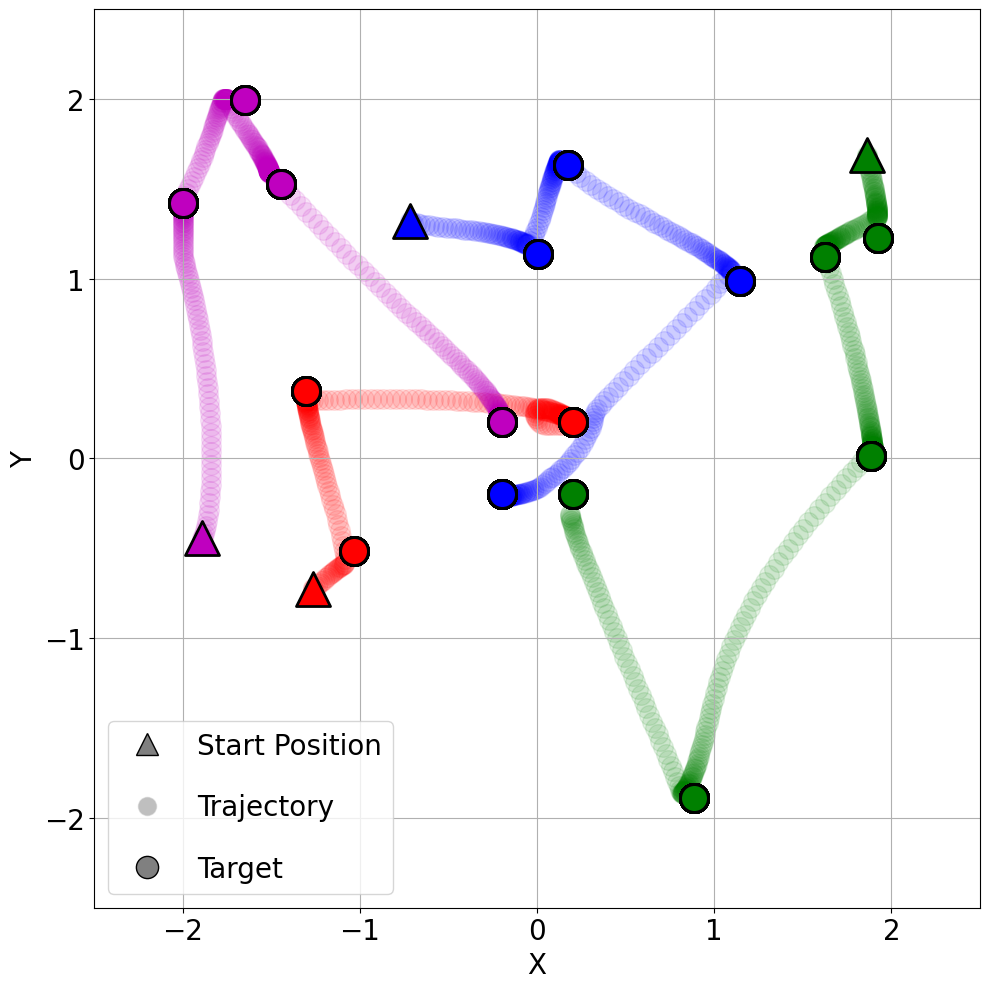

In [5]:
import re
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

# === 1. 파일 경로 ===
file_path = "./agents_trajectory.txt"  # 필요시 절대경로로 수정

# === 2. 데이터 파싱 ===
agent_xy_positions = []
current_agent_data = []

with open(file_path, 'r') as file:
    for line in file:
        if "Agent" in line and "positions" in line:
            if current_agent_data:
                agent_xy_positions.append(current_agent_data)
                current_agent_data = []
        match = re.search(r"x=([-.\d]+), y=([-.\d]+), g_x=([-.\d]+), g_y=([-.\d]+)", line)
        if match:
            x, y, gx, gy = map(float, match.groups())
            current_agent_data.append((x, y, gx, gy))

    if current_agent_data:
        agent_xy_positions.append(current_agent_data)

# === 3. 시각화 ===
colors = ['r', 'g', 'b', 'm', 'c', 'y', 'k']
clip_start = 654
clip_end = 1016

plt.figure(figsize=(10, 10))

for agent_id, positions in enumerate(agent_xy_positions):
    clip_positions = positions[clip_start:clip_end]
    xs = [pos[0] for pos in clip_positions]
    ys = [pos[1] for pos in clip_positions]
    gxs = [pos[2] for pos in clip_positions]
    gys = [pos[3] for pos in clip_positions]

    color = colors[agent_id % len(colors)]

    plt.scatter(xs, ys, color=color, marker='o', alpha=0.1, s=200, label=f'agent_{agent_id}')
    plt.scatter(xs[0], ys[0], color=color, marker='^', s=600,
                edgecolors='black', linewidths=2, label=f'Start_{agent_id}')
    plt.scatter(gxs, gys, color=color, marker='o', s=400,
                edgecolors='black', linewidths=2, label=f'Target_{agent_id}', zorder=2)

# === 4. 커스텀 범례 ===
custom_legend = [
    Line2D([0], [0], marker='^', color='w', label='Start Position',
           markerfacecolor='gray', markeredgecolor='black', markersize=16),
    Line2D([0], [0], marker='o', color='w', label='Trajectory',
           markerfacecolor='gray', alpha=0.5, markersize=14),
    Line2D([0], [0], marker='o', color='w', label='Target',
           markerfacecolor='gray', markeredgecolor='black', markersize=16)
]

plt.legend(handles=custom_legend, loc='lower left', labelspacing=1.2, fontsize=20)
plt.grid(True)
plt.xlim(-2.5, 2.5)
plt.ylim(-2.5, 2.5)
plt.xlabel("X", fontsize=20)
plt.ylabel("Y", fontsize=20)
plt.tick_params(labelsize=20)
plt.tight_layout()
plt.show()